# 4 Matplotlib数据可视化 II

## 4.8　配置图例
想在可视化图形中使用图例，可以为不同的图形元素分配标签。前面介绍过如何创建简单的图例，现在将介绍如何在Matplotlib 中自定义图例的位置与艺术风格。

可以用plt.legend() 命令来创建最简单的图例，它会自动创建一个包含每个图形元素的图例（如图4-41 所示）：

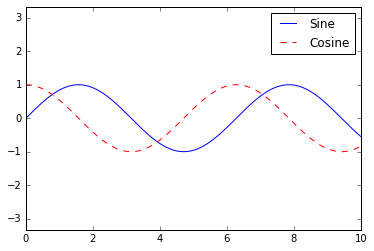

In [2]:
import matplotlib.pyplot as plt
plt.style.use('classic')

%matplotlib inline
import numpy as np

x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

但是，我们经常需要对图例进行各种个性化的配置。例如，我们想设置图例的位置，并取消外边框（如图4-42 所示）：

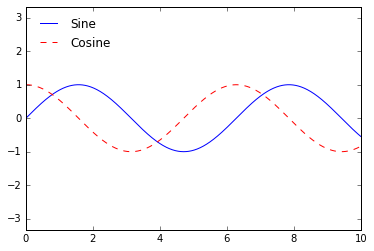

In [3]:
ax.legend(loc='upper left', frameon=False)
fig

还可以用ncol 参数设置图例的标签列数（如图4-43 所示）：

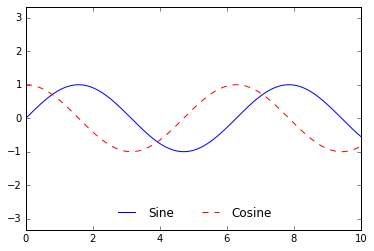

In [4]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

还可以为图例定义圆角边框（fancybox）、增加阴影、改变外边框透明度（framealpha 值），或者改变文字间距（如图4-44 所示）：

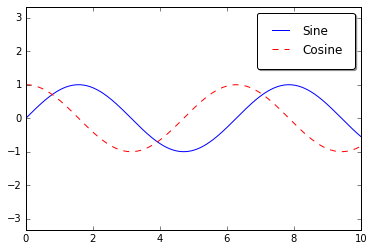

In [5]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

关于图例的更多配置信息，请参考plt.legend 程序文档。

### 4.8.1　选择图例显示的元素
我们已经看到，图例会默认显示所有元素的标签。如果你不想显示全部，可以通过一些图形命令来指定显示图例中的哪些元素和标签。plt.plot() 命令可以一次创建多条线，返回线条实例列表。一种方法是将需要显示的线条传入plt.legend()，另一种方法是只为需要在图例中显示的线条设置标签（如图4-45 所示）：

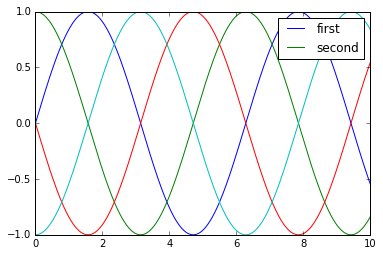

In [6]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines变量是一组plt.Line2D实例
plt.legend(lines[:2], ['first', 'second']);

在实践中，我发现第一种方法更清晰。当然也可以只为需要在图例中显示的元素设置标签（如图4-46 所示）：

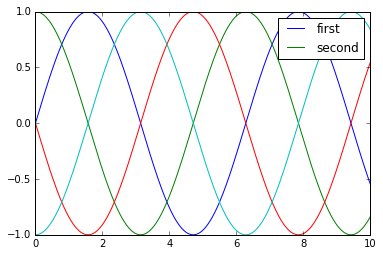

In [7]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

需要注意的是，默认情况下图例会忽略那些不带标签的元素。

### 4.8.2　在图例中显示不同尺寸的点
有时，默认的图例仍然不能满足我们的可视化需求。例如，你可能需要用不同尺寸的点来表示数据的特征，并且希望创建这样的图例来反映这些特征。下面的示例将用点的尺寸来表明美国加州不同城市的人口数量。如果我们想要一个通过不同尺寸的点显示不同人口数量级的图例，可以通过隐藏一些数据标签来实现这个效果（如图4-47 所示）：

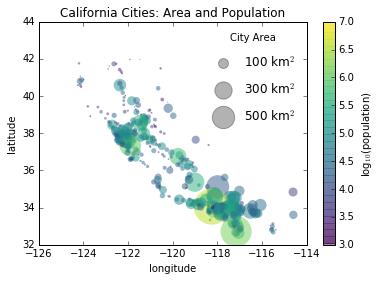

In [8]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')

# 提取感兴趣的数据
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# 用不同尺寸和颜色的散点图表示数据，但是不带标签
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# 下面创建一个图例：
# 画一些带标签和尺寸的空列表
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

由于图例通常是图形中对象的参照，因此如果我们想显示某种形状，就需要将它画出来。但是在这个示例中，我们想要的对象（灰色圆圈）并不在图形中，因此把它们用空列表假装画出来。还需要注意的是，**图例只会显示带标签的元素**。

为了画出这些空列表中的图形元素，需要为它们设置标签，以便图例可以显示它们，这样就可以从图例中获得想要的信息了。这个策略对于创建复杂的可视化图形很有效。

最后需要注意的是，在处理这类地理数据的时候，如果能把州的地理边界或其他地图元素也显示出来，那么图形就会更加逼真。Matplotlib 的Basemap（底图）插件工具箱恰好是做这种事情的最佳选择，我们将在4.15 节介绍它。

### 4.8.3　同时显示多个图例
有时，我们可能需要在同一张图上显示多个图例。不过，用Matplotlib 解决这个问题并不容易，因为通过标准的legend 接口只能为一张图创建一个图例。如果你想用`plt.legend()`或`ax.legend()`方法创建第二个图例，那么第一个图例就会被覆盖。但是，我们可以通过从头开始创建一个新的图例艺术家对象（legend artist），然后用底层的（lower-level）`ax.add_artist()`方法在图上添加第二个图例（如图4-48 所示）：

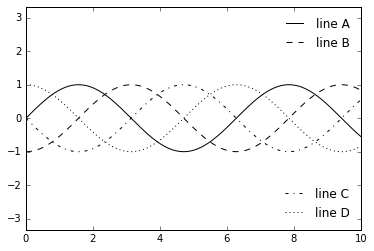

In [9]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# 设置第一个图例要显示的线条和标签
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# 创建第二个图例，通过add_artist方法添加到图上
from matplotlib.legend import Legend

leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);

这里只是小试了一下构成Matplotlib 图形的底层图例艺术家对象。如果你查看过`ax.legend()`的源代码（前面介绍过，在IPython Notebook 里面用`ax.legend??` 来显示源代码），就会发现这个函数通过几条简单的逻辑就创建了一个Legend 图例艺术家对象，然后被保存到了legend_ 属性里。当图形被画出来之后，就可以将该图例增加到图形上。

## 4.9　配置颜色条
图例通过离散的标签表示离散的图形元素。然而，对于图形中由彩色的点、线、面构成的连续标签，用颜色条来表示的效果比较好。
**在Matplotlib 里面，颜色条是一个独立的坐标轴，可以指明图形中颜色的含义**。由于本书是单色印刷，你可以在本书[在线附录](https://github.com/jakevdp/PythonDataScienceHandbook)中查看这一节图形的彩色版本。首先还是导入需要使用的画图工具：

In [10]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [11]:
%matplotlib inline
import numpy as np

和在前面看到的一样，通过plt.colorbar 函数就可以创建最简单的颜色条（如图4-49所示）：

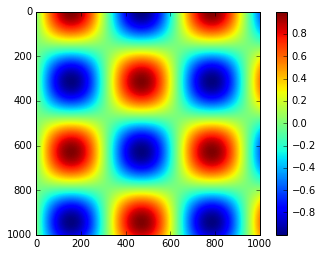

In [12]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])
plt.imshow(I)
plt.colorbar();

下面将介绍一些颜色条的个性化配置方法，让你能将它们有效地应用于不同场景中。

### 4.9.1　配置颜色条
可以通过cmap 参数为图形设置颜色条的配色方案（如图4-50 所示）：

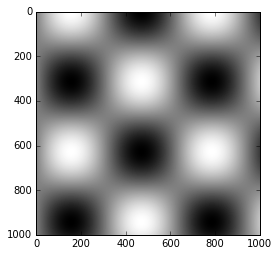

In [13]:
plt.imshow(I, cmap='gray');

所有可用的配色方案都在plt.cm 命名空间里面，在IPython 里通过Tab 键就可以查看所有的配置方案：
<br>`plt.cm.<TAB>`

有了这么多能够作为备选的配色方案只是第一步，更重要的是如何确定用哪种方案！最终
的选择结果可能和你一开始想用的有很大不同。

#### 1. 选择配色方案
关于可视化图形颜色选择的全部知识超出了本书的介绍范围，但如果你想了解与此相关的入门知识，可以参考文章[“Ten Simple Rules for Better Figures”](http://bit.ly/2fDJn9J)。Matplotlib 的在线文档中也有关于配色方案选择的有趣论述（http://matplotlib.org/1.4.1/users/colormaps.html ）。

一般情况下，你只需要重点关注三种不同的配色方案。
* **顺序配色方案**
    * 由一组连续的颜色构成的配色方案（例如binary 或viridis）。
* **互逆配色方案**
    * 通常由两种互补的颜色构成，表示正反两种含义（例如RdBu 或PuOr）。
* **定性配色方案**
    * 随机顺序的一组颜色（例如rainbow 或jet）。
    
jet 是一种定性配色方案，曾是Matplotlib 2.0 之前所有版本的默认配色方案。把它作为默认配色方案实在不是个好主意，因为定性配色方案在对定性数据进行可视化时的选择空间
非常有限。随着图形亮度的提高，经常会出现颜色无法区分的问题。

可以通过把jet 转换为黑白的灰度图看看具体的颜色（如图4-51 所示）：

In [14]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """为配色方案显示灰度图"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    # 将RGBA色转换为不同亮度的灰度值
    # 参考链接http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)

def view_colormap(cmap):
    """用等价的灰度图表示配色方案"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    fig, ax = plt.subplots(2, figsize=(6, 2),
    subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

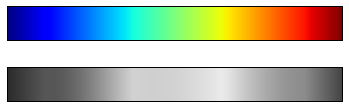

In [15]:
view_colormap('jet')

注意观察灰度图里比较亮的那部分条纹。这些亮度变化不均匀的条纹在彩色图中对应某一段彩色区间，由于色彩太接近容易突显出数据集中不重要的部分，导致眼睛无法识别重点。更好的配色方案是viridis（已经成为Matplotlib 2.0 的默认配色方案）。它采用了精心设计的亮度渐变方式，这样不仅便于视觉观察，而且转换成灰度图后也更清晰（如图4-52所示）：

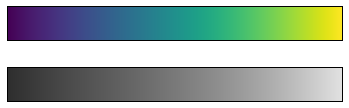

In [16]:
view_colormap('viridis')

如果你喜欢彩虹效果，可以用cubehelix 配色方案来可视化连续的数值（如图4-53 所示）：

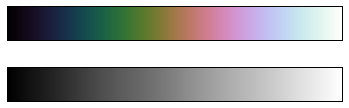

In [17]:
view_colormap('cubehelix')

至于其他的场景，例如要用两种颜色表示正反两种含义时，可以使用RdBu 双色配色方案（红色- 蓝色，Red-Blue 简称）。但正如图4-54 所示，用红色、蓝色表示的正反两种信息在灰度图上看不出差别！

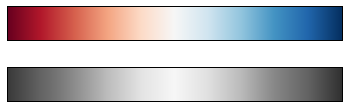

In [18]:
view_colormap('RdBu')

我们将在后面的章节中继续使用这些配色方案。

Matplotlib 里面有许多配色方案，在IPython 里面用Tab 键浏览plt.cm 模块就可以看到所有内容。关于Python 语言中配色的更多基本原则，可以参考Seaborn 程序库的工具和文档（详情请参4.16 节）。

#### 2. 颜色条刻度的限制与扩展功能的设置
Matplotlib 提供了丰富的颜色条配置功能。由于可以将颜色条本身仅看作是一个`plt.Axes`实例，因此前面所学的所有关于坐标轴和刻度值的格式配置技巧都可以派上用场。颜色条有一些有趣的特性。例如，我们可以缩短颜色取值的上下限，对于超出上下限的数据，通过extend 参数用三角箭头表示比上限大的数或者比下限小的数。这种方法很简单，比如你想展示一张噪点图（如图4-55 所示）：

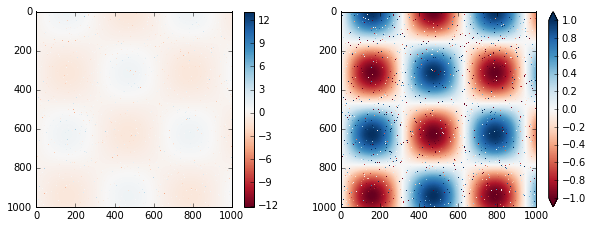

In [19]:
# 为图形像素设置1%噪点
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

左边那幅图是用默认的颜色条刻度限制实现的效果，噪点的范围完全覆盖了我们感兴趣的数据。而右边的图形设置了颜色条的刻度上下限，并在上下限之外增加了扩展功能，这样的数据可视化图形显然更有效果。

#### 3. 离散型颜色条
虽然颜色条默认都是连续的，但有时你可能也需要表示离散数据。最简单的做法就是使用`plt.cm.get_cmap()` 函数，将适当的配色方案的名称以及需要的区间数量传进去即可（如图4-56 所示）：

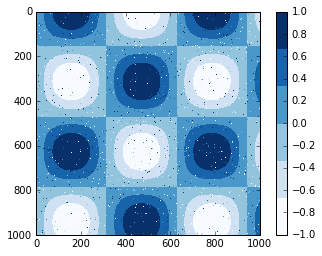

In [20]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1);

这种离散型颜色条和其他颜色条的用法相同。

### 4.9.2　案例：手写数字
让我们来看一些有趣的手写数字可视化图，这可能是一个比较实用的案例。数据在Scikit-Learn 里面，包含近2000 份8×8 的手写数字缩略图。

先下载数据，然后用plt.imshow() 对一些图形进行可视化（如图4-57 所示）：

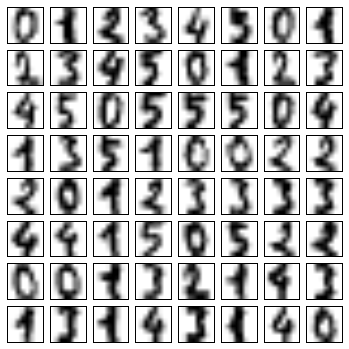

In [21]:
# 加载数字0~5的图形，对其进行可视化
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

由于每个数字都由64 像素的色相（hue）构成，因此可以将每个数字看成是一个位于64维空间的点，即每个维度表示一个像素的亮度。但是想通过可视化来描述如此高维度的空间是非常困难的。一种解决方案是通过降维技术，在尽量保留数据内部重要关联性的同时降低数据的维度，例如流形学习（manifold learning）。降维是无监督学习的重要内容，5.1
节将详细介绍这部分知识。

暂且不提具体的降维细节，先来看看如何用流形学习将这些数据投影到二维空间进行可视化（详情请参见5.10 节）：

In [22]:
# 用IsoMap方法将数字投影到二维空间
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

我们将用离散型颜色条来显示结果，调整ticks 与clim 参数来改善颜色条（如图4-58所示）：

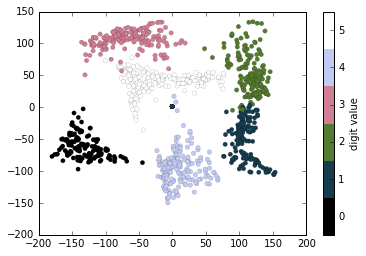

In [23]:
# 画图
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

这个投影结果还向我们展示了一些数据集的有趣特性。例如，数字5 与数字3 在投影中有大面积重叠，说明一些手写的5 与3 难以区分，因此自动分类算法也更容易搞混它们。其他的数字，像数字0 与数字1，隔得特别远，说明两者不太可能出现混淆。这个观察结果也符合我们的直观感受，因为5 和3 看起来确实要比0 和1 更像。

我们将在第5 章深入学习流形学习和手写数字识别的相关内容。

## 4.10　多子图
有时候需要从多个角度对数据进行对比。Matplotlib 为此提出了子图（subplot）的概念：在较大的图形中同时放置一组较小的坐标轴。这些子图可能是画中画（inset）、网格图（grid of plots），或者是其他更复杂的布局形式。在这一节中，我们将介绍四种用Matplotlib 创建子图的方法。

首先，在Notebook 中导入画图需要的程序库：

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

### 4.10.1　plt.axes：手动创建子图
创建坐标轴最基本的方法就是使用plt.axes 函数。前面已经介绍过，这个函数的默认配置是创建一个标准的坐标轴，填满整张图。它还有一个可选参数，由图形坐标系统的四个值构成。这四个值分别表示图形坐标系统的 [bottom, left, width, height]（底坐标、左坐标、宽度、高度），数值的取值范围是左下角（原点）为0，右上角为1。

如果想要在右上角创建一个画中画，那么可以首先将x 与y 设置为0.65（就是坐标轴原点位于图形高度65% 和宽度65% 的位置），然后将x 与y 扩展到0.2（也就是将坐标轴的宽度与高度设置为图形的20%）。图4-59 显示了代码的结果：

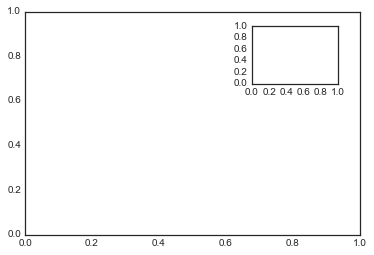

In [25]:
ax1 = plt.axes() # 默认坐标轴
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

面向对象画图接口中类似的命令有fig.add_axes()。用这个命令创建两个竖直排列的坐标轴（如图4-60 所示）：

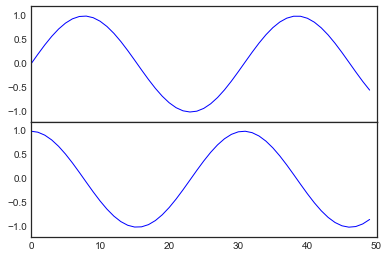

In [26]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

现在就可以看到两个紧挨着的坐标轴（上面的坐标轴没有刻度）：上子图（起点y 坐标为0.5 位置）与下子图的x 轴刻度是对应的（起点y 坐标为0.1，高度为0.4）。

### 4.10.2　plt.subplot：简易网格子图
若干彼此对齐的行列子图是常见的可视化任务，Matplotlib 拥有一些可以轻松创建它们的简便方法。最底层的方法是用·plt.subplot()·在一个网格中创建一个子图。这个命令有三个整型参数——将要创建的网格子图行数、列数和索引值，索引值从1 开始，从左上角到右下角依次增大（如图4-61 所示）：

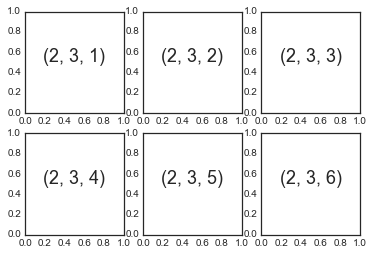

In [27]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

`plt.subplots_adjust` 命令可以调整子图之间的间隔。用面向对象接口的命令`fig.add_subplot()`可以取得同样的效果（结果如图4-62 所示）：

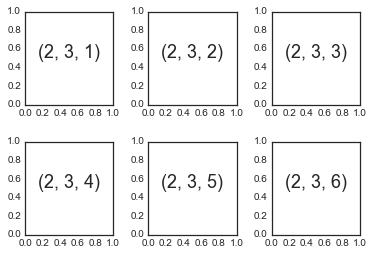

In [28]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
            fontsize=18, ha='center')

我们通过plt.subplots_adjust 的hspace 与wspace 参数设置与图形高度与宽度一致的子图间距，数值以子图的尺寸为单位（在本例中，间距是子图宽度与高度的40%）。

### 4.10.3　plt.subplots：用一行代码创建网格
当你打算创建一个大型网格子图时，就没办法使用前面那种亦步亦趋的方法了，尤其是当你想隐藏内部子图的x 轴与y 轴标题时。出于这一需求，`plt.subplots()`实现了你想要的功能（需要注意此处subplots 结尾多了个s）。这个函数不是用来创建单个子图的， 而是用一行代码创建多个子图，并返回一个包含子图的NumPy 数组。关键参数是行数与列数，以及可选参数sharex 与sharey，通过它们可以设置不同子图之间的关联关系。

我们将创建一个2×3 网格子图，每行的3 个子图使用相同的y 轴坐标，每列的2 个子图
使用相同的x 轴坐标（如图4-63 所示）：

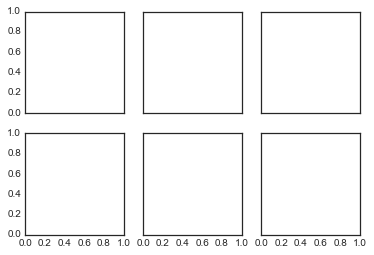

In [29]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

In [ ]:
设置sharex 与sharey 参数之后，我们就可以自动去掉网格内部子图的标签，让图形看起
来更整洁。坐标轴实例网格的返回结果是一个NumPy 数组，这样就可以通过标准的数组
取值方式轻松获取想要的坐标轴了（如图4-64 所示）：

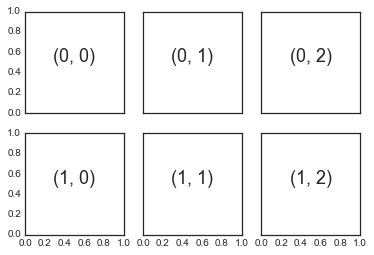

In [30]:
# 坐标轴存放在一个NumPy数组中，按照[row, col]取值
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

与`plt.subplot()`相比，`plt.subplots()` 与Python 索引从0 开始的习惯保持一致。

### 4.10.4　plt.GridSpec：实现更复杂的排列方式
如果想实现不规则的多行多列子图网格，`plt.GridSpec()` 是最好的工具。`plt.GridSpec()`对象本身不能直接创建一个图形，它只是`plt.subplot()` 命令可以识别的简易接口。例如，一个带行列间距的2×3 网格的配置代码如下所示：

In [31]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

可以通过类似Python 切片的语法设置子图的位置和扩展尺寸（如图4-65 所示）：

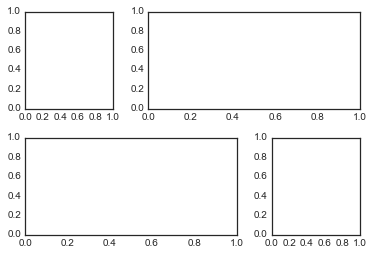

In [32]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

这种灵活的网格排列方式用途十分广泛，我经常会用它来创建如图4-66 所示的多轴频次直方图（multi-axes histogram）（如图4-66 所示）：

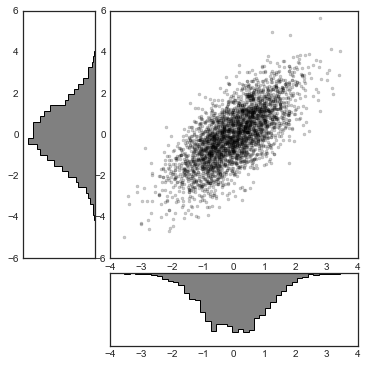

In [33]:
# 创建一些正态分布数据
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# 设置坐标轴和网格配置方式
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# 主坐标轴画散点图
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# 次坐标轴画频次直方图
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()
y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

这种类型的分布图十分常见，Seaborn 程序包提供了专门的API 来实现它们，详情请参见4.16 节。

## 4.11　文字与注释
一个优秀的可视化作品就是给读者讲一个精彩的故事。虽然在一些场景中，这个故事可以完全通过视觉来表达，不需要任何多余的文字。但在另外一些场景中，辅之以少量的文字提示（textual cue）和标签是必不可少的。虽然最基本的注释（annotation）类型可能只是坐标轴标题与图标题，但注释可远远不止这些。让我们可视化一些数据，看看如何通过添加注释来更恰当地表达信息。还是先在Notebook 里面导入画图需要用到的一些函数：

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

### 4.11.1　案例：节假日对美国出生率的影响
让我们用3.10.4 节介绍过的的数据来演示。在那个案例中，我们画了一幅图表示美国每一年的出生人数。和前面一样，数据可以https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv 下载。

首先用前面介绍过的清洗方法处理数据，然后画出结果（如图4-67 所示）：

In [36]:
births = pd.read_csv('data/births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year + 
                              100 * births.month + 
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births', 
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

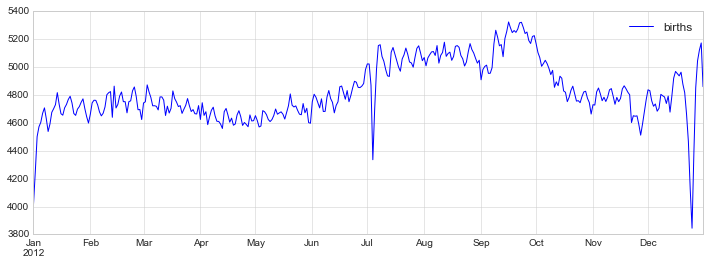

In [37]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

在用这样的图表达观点时，如果可以在图中增加一些注释，就更能吸引读者的注意了。可以通过plt.text/ ax.text 命令手动添加注释，它们可以在具体的x / y 坐标点上放上文字（如图4-68 所示）：

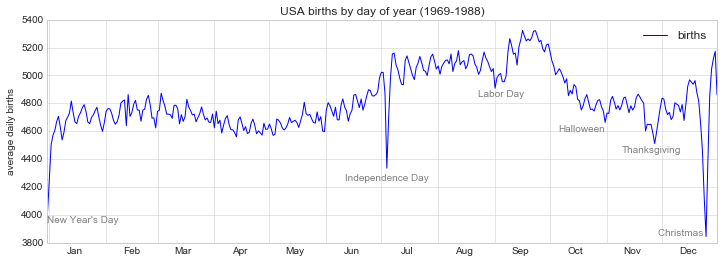

In [38]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# 在图上增加文字标签
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# 设置坐标轴标题
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# 设置x轴刻度值，让月份居中显示
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.text 方法需要一个x 轴坐标、一个y 轴坐标、一个字符串和一些可选参数，比如文字的颜色、字号、风格、对齐方式以及其他文字属性。这里用了ha='right' 与ha='center'，ha 是水平对齐方式（horizonal alignment）的缩写。关于配置参数的更多信息，请参考plt.text() 与mpl.text.Text() 的程序文档。

### 4.11.2　坐标变换与文字位置
前面的示例将文字放在了目标数据的位置上。但有时候可能需要将文字放在与数据无关的位置上，比如坐标轴或者图形中。在Matplotlib 中，我们通过调整坐标变换（transform）来实现。

任何图形显示框架都需要一些变换坐标系的机制。例如，当一个位于(x, y) = (1, 1) 位置的点需要以某种方式显示在图上特定的位置时，就需要用屏幕的像素来表示。用数学方法处理这种坐标系变换很简单，Matplotlib 有一组非常棒的工具可以实现类似功能（这些工具位于matplotlib.transforms 子模块中）。

虽然一般用户并不需要关心这些变换的细节，但是了解这些知识对在图上放置文字大有帮助。一共有三种解决这类问题的预定义变换方式。
* ax.transData 
    * 以数据为基准的坐标变换。
* ax.transAxes
    * 以坐标轴为基准的坐标变换（以坐标轴维度为单位）。
* fig.transFigure
    * 以图形为基准的坐标变换（以图形维度为单位）。

下面举一个例子，用三种变换方式将文字画在不同的位置（如图4-69 所示）：

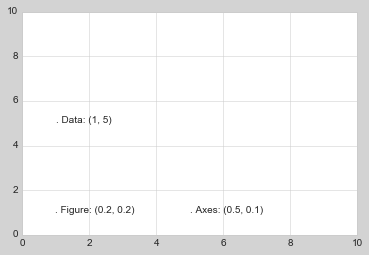

In [39]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# 虽然transform=ax.transData是默认值，但还是设置一下
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);

默认情况下，上面的文字在各自的坐标系中都是左对齐的。这三个字符串开头的. 字符基本就是对应的坐标位置。

transData 坐标用x 轴与y 轴的标签作为数据坐标。transAxes 坐标以坐标轴（图中白色矩形）左下角的位置为原点，按坐标轴尺寸的比例呈现坐标。transFigure 坐标与之类似，不过是以图形（图中灰色矩形）左下角的位置为原点，按图形尺寸的比例呈现坐标。

需要注意的是，假如你改变了坐标轴上下限，那么只有transData 坐标会受影响，其他坐标系都不变（如图4-70 所示）：

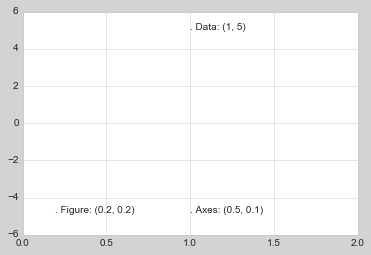

In [40]:
ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)
fig

如果你改变了坐标轴上下限，那么就可以更清晰地看到刚刚所说的变化。如果你是在Notebook 里运行本书代码的，那么可以把%matplotlib inline 改成%matplotlib notebook，然后用图形菜单与图形交互（拖动按钮即可），就可以实现坐标轴平移了。

### 4.11.3　箭头与注释
除了刻度线和文字，简单的箭头也是一种有用的注释标签。

在Matplotlib 里面画箭头通常比你想象的要困难。虽然有一个plt.arrow() 函数可以实现这个功能，但是我不推荐使用它，因为它创建出的箭头是SVG 向量图对象，会随着图形分辨率的变化而改变，最终的结果可能完全不是用户想要的。我要推荐的是plt.annotate()函数。这个函数既可以创建文字，也可以创建箭头，而且它创建的箭头能够进行非常灵活的配置。

下面用annotate 的一些配置选项来演示（如图4-71 所示）：

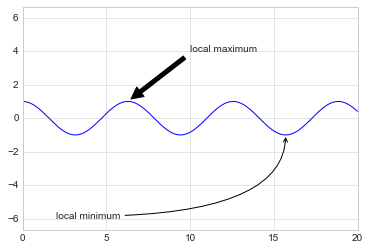

In [41]:
%matplotlib inline

fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

箭头的风格是通过arrowprops 字典控制的，里面有许多可用的选项。由于这些选项在Matplotlib 的官方文档中都有非常详细的介绍，我就不再赘述，仅做一点儿功能演示。让我们用前面的美国出生人数图来演示一些箭头注释（如图4-72 所示）：

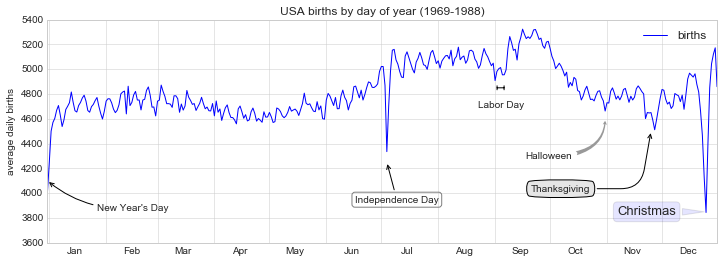

In [42]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# 在图上增加箭头标签
ax.annotate("New Year's Day", xy=('2012-1-1', 4100), xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250), xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')

ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600), xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500), xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))

ax.annotate('Christmas', xy=('2012-12-25', 3850), xycoords='data',
            xytext=(-30, 0), textcoords='offset points',
            size=13, ha='right', va="center",
            bbox=dict(boxstyle="round", alpha=0.1),
            arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# 设置坐标轴标题
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# 设置x轴刻度值，让月份居中显示
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400);

你可能已经注意到了，箭头和文本框的配置功能非常细致，这样你就可以创建自己想要的箭头风格了。不过，功能太过细致往往也就意味着操作起来比较复杂，如果真要做一个产品级的图形，可能得耗费大量的时间。最后我想说一句，前面适用的混合风格并不是数据可视化的最佳实践，仅仅是为演示一些功能而已。

关于箭头和注释风格的更多介绍与示例，可以在Matplotlib 的画廊（gallery）中看到，尤其推荐http://matplotlib.org/examples/pylab_examples/annotation_demo2.html 这个例子。

## 4.12　自定义坐标轴刻度
虽然Matplotlib 默认的坐标轴定位器（locator）与格式生成器（formatter）可以满足大部分需求，但是并非对每一幅图都合适。本节将通过一些示例演示如何将坐标轴刻度调整为你需要的位置与格式。

在介绍示例之前，我们最好先对Matplotlib 图形的对象层级有更深入的理解。Matplotlib 的目标是用Python 对象表现任意图形元素。例如，想想前面介绍的figure 对象，它其实就
是一个盛放图形元素的包围盒（bounding box）。可以将每个Matplotlib 对象都看成是子对象（sub-object）的容器，例如每个figure 都会包含一个或多个axes 对象，每个axes 对象又会包含其他表示图形内容的对象。

坐标轴刻度线也不例外。每个axes 都有xaxis 和yaxis 属性，每个属性同样包含构成坐标
轴的线条、刻度和标签的全部属性。

### 4.12.1　主要刻度与次要刻度
每一个坐标轴都有主要刻度线与次要刻度线。顾名思义，主要刻度往往更大或更显著，而次要刻度往往更小。虽然一般情况下Matplotlib 不会使用次要刻度，但是你会在对数图中看到它们（如图4-73 所示）：

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

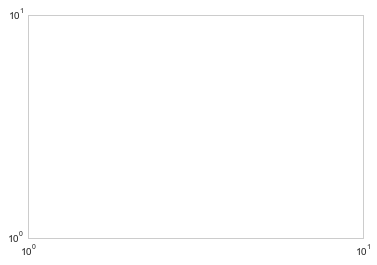

In [44]:
ax = plt.axes(xscale='log', yscale='log')

我们发现每个主要刻度都显示为一个较大的刻度线和标签，而次要刻度都显示为一个较小的刻度线，且不显示标签。

可以通过设置每个坐标轴的formatter 与locator 对象，自定义这些刻度属性（包括刻度线的位置和标签）。来检查一下图形x 轴的属性：

In [45]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

In [46]:
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

我们会发现，主要刻度标签和次要刻度标签的位置都是通过一个LogLocator 对象（在对数图中可以看到）设置的。然而，次要刻度有一个NullFormatter 对象处理标签，这样标签就不会在图上显示了。

下面来演示一些示例，看看不同图形的定位器与格式生成器是如何设置的。

### 4.12.2　隐藏刻度与标签
最常用的刻度/ 标签格式化操作可能就是隐藏刻度与标签了，可以通过plt.NullLocator()与plt.NullFormatter() 实现，如下所示（如图4-74 所示）：

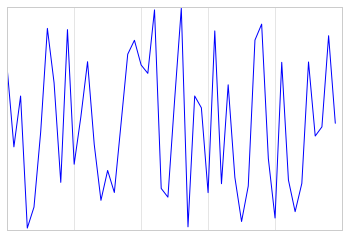

In [47]:
ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

需要注意的是，我们移除了x 轴的标签（但是保留了刻度线/ 网格线），以及y 轴的刻度（标签也一并被移除）。在许多场景中都不需要刻度线，比如当你想要显示一组图形时。举个例子，像图4-75 那样包含不同人脸的照片，就是经常用于研究有监督机器学习问题的示例（详情请参见5.7 节）：

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Percy\scikit_learn_data


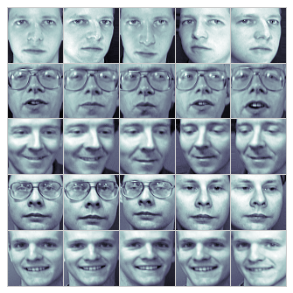

In [48]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)

# 从scikit-learn获取一些人脸照片数据
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap="bone")

需要注意的是，由于每幅人脸图形默认都有各自的坐标轴，然而在这个特殊的可视化场景中，刻度值（本例中是像素值）的存在并不能传达任何有用的信息，因此需要将定位器设置为空。

### 4.12.3　增减刻度数量
默认刻度标签有一个问题，就是显示较小图形时，通常刻度显得十分拥挤。我们可以在图4-76 的网格中看到类似的问题：

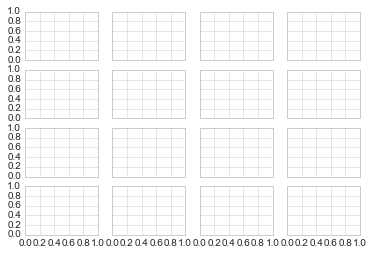

In [49]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

尤其是x 轴，数字几乎都重叠在一起，辨识起来非常困难。我们可以用plt.MaxNLocator()来解决这个问题，通过它可以设置最多需要显示多少刻度。根据设置的最多刻度数量，Matplotlib 会自动为刻度安排恰当的位置（如图4-77 所示）：

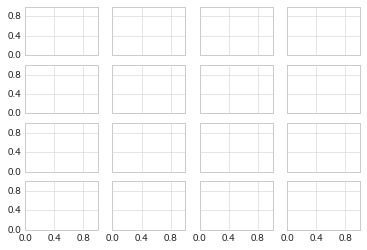

In [50]:
# 为每个坐标轴设置主要刻度定位器
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig

这样图形就显得更简洁了。如果你还想要获得更多的配置功能，那么可以试试plt.MultipleLocator，我们将在接下来的内容中介绍它。

### 4.12.4　花哨的刻度格式
Matplotlib 默认的刻度格式可以满足大部分的需求。虽然默认配置已经很不错了，但是有时候你可能需要更多的功能，例如图4-78 中的正弦曲线和余弦曲线：

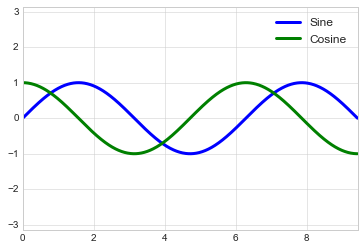

In [51]:
# 画正弦曲线和余弦曲线
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# 设置网格、图例和坐标轴上下限
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);

我们可能想稍稍改变一下这幅图。首先，如果将刻度与网格线画在π 的倍数上，图形会更加自然。可以通过设置一个MultipleLocator 来实现，它可以将刻度放在你提供的数值的倍数上。为了更好地测量，在π/4 的倍数上添加主要刻度和次要刻度（如图4-79所示）：

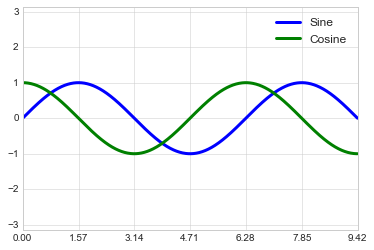

In [52]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
fig

然而，这些刻度标签看起来有点奇怪：虽然我们知道它们是π 的倍数，但是用小数表示圆周率不太直观。因此，我们可以用刻度格式生成器来修改。由于没有内置的格式生成器可以直接解决问题，因此需要用plt.FuncFormatter 来实现，用一个自定义的函数设置不同刻度标签的显示（如图4-80 所示）：

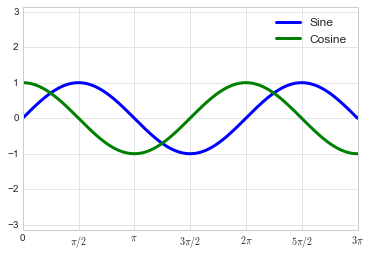

In [53]:
def format_func(value, tick_number):
    # 找到π/2的倍数刻度
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)
    
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

这样就好看多啦！其实我们已经用了Matplotlib 支持LaTeX 的功能，在数学表达式两侧加
上美元符号（$），这样可以非常方便地显示数学符号和数学公式。在这个示例中，"$\pi$"
就表示圆周率符合π。

当你准备展示或打印图形时，plt.FuncFormatter() 不仅可以为自定义图形刻度提供十分灵
活的功能，而且用法非常简单。

### 4.12.5　格式生成器与定位器小结
前面已经介绍了一些格式生成器与定位器，下面用表格简单地总结一下内置的格式生成器与定位器选项。关于两者更详细的信息，请参考各自的程序文档或者Matplotlib 的在线文档。以下的所有类都在plt 命名空间内。

|定位器类|描述|
|:|:|
|NullLocator |无刻度|
|FixedLocator |刻度位置固定|
|IndexLocator |用索引作为定位器（如x = range(len(y)) ）|
|LinearLocator |从min 到max 均匀分布刻度|
|LogLocator |从min 到max 按对数分布刻度|
|MultipleLocator |刻度和范围都是基数（base）的倍数|
|MaxNLocator |为最大刻度找到最优位置|
|AutoLocator |（默认）以MaxNLocator 进行简单配置|
|AutoMinorLocator |次要刻度的定位器|

|格式生成器类|描述|
|:|:|
|NullFormatter |刻度上无标签|
|IndexFormatter |将一组标签设置为字符串|
|FixedFormatter |手动为刻度设置标签|
|FuncFormatter |用自定义函数设置标签|
|FormatStrFormatter |为每个刻度值设置字符串格式|
|ScalarFormatter |（默认）为标量值设置标签|
|LogFormatter |对数坐标轴的默认格式生成器|

我们将在后面的章节中看到使用这些功能的更多示例。

## 4.13　Matplotlib自定义：配置文件与样式表
Matplotlib 的默认图形设置经常被用户诟病。虽然Matplotlib 2.0 版本已经有大幅改善，但是掌握自定义配置的方法可以让我们打造自己的艺术风格。

首先简单浏览一下Matplotlib 的运行时配置（runtime configuration，rc）功能的介绍，然后再看看新式的样式表（stylesheets）特性，里面包含了许多漂亮的默认配置功能。

### 4.13.1　手动配置图形
通过本章的介绍，我们已经知道如何修改单个图形配置，使得最终图形比原来的图形更好看。可以为每个单独的图形进行个性化设置。举个例子，看看由下面这个土到掉渣的默认配置生成的频次直方图（如图4-81 所示）：

In [56]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

%matplotlib inline

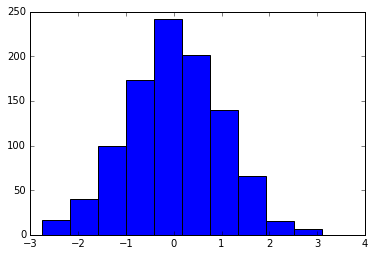

In [57]:
x = np.random.randn(1000)
plt.hist(x);

通过手动调整，可以让它成为美图，最终效果如图4-82 所示：

In [ ]:
# 用灰色背景
ax = plt.axes(axisbg='#E6E6E6')
ax.set_axisbelow(True)

# 画上白色的网格线
plt.grid(color='w', linestyle='solid')

# 隐藏坐标轴的线条
for spine in ax.spines.values():
    spine.set_visible(False)
    
# 隐藏上边与右边的刻度
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# 弱化刻度与标签
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')

# 设置频次直方图轮廓色与填充色
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

这样看起来就漂亮多了。你可能会觉得它的风格与R 语言的ggplot 可视化程序包有点儿像。但这样设置可太费劲儿了！我们肯定不希望每做一个图都需要这样手动配置一番。好在已经有一种方法，可以让我们只配置一次默认图形，就能将其应用到所有图形上。

### 4.13.2　修改默认配置：rcParams
Matplotlib 每次加载时，都会定义一个运行时配置（rc），其中包含了所有你创建的图形元素的默认风格。你可以用plt.rc 简便方法随时修改这个配置。来看看如何调整rc 参数，
用默认图形实现之前手动调整的效果。

先复制一下目前的rcParams 字典，这样可以在修改之后再还原回来：

In [62]:
IPython_default = plt.rcParams.copy()

现在就可以用plt.rc 函数来修改配置参数了：

In [63]:
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

设置完成之后，来创建一个图形看看效果（如图4-83 所示）：

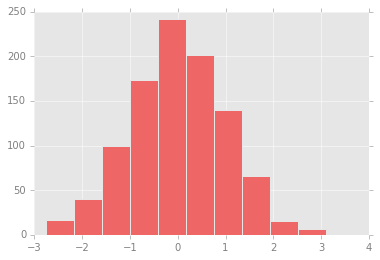

In [64]:
plt.hist(x);

再画一些线图看看rc 参数的效果（如图4-84 所示）：

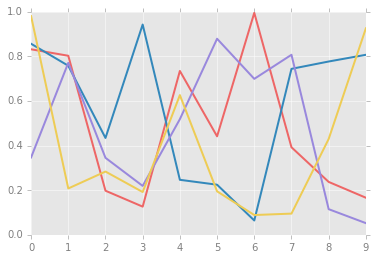

In [65]:
for i in range(4):
    plt.plot(np.random.rand(10))

新的艺术风格比之前的默认风格更漂亮了。如果你不认同我的审美风格，当然可以自己调整rc 参数，创造自己的风格！这些设置会保存在.matplotlibrc 文件中，你可以在[Matplotlib 文档](http://matplotlib.org/users/customizing.html)中找到更多信息这时有人说了，他们更喜欢自定义Matplotlib 的样式表。

### 4.13.3　样式表
2014 年8 月发布的Matplotlib 1.4 版本中增加了一个非常好用的style 模块，里面包含了大量的新式默认样式表，还支持创建和打包你自己的风格。虽然这些样式表实现的格式功能与前面介绍的.matplotlibrc 文件类似，但是它的文件扩展名是.mplstyle。即使你不打算创建自己的绘图风格，样式表包含的默认内容也非常有用。通过plt.style.available 命令可以看到所有可用的风格，下面将简单介绍前五种风格：

In [66]:
plt.style.available[:5]

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight']

使用某种样式表的基本方法如下所示：

plt.style.use('stylename')

但需要注意的是，这样会改变后面所有的风格！如果需要，你可以使用风格上下文管理器
（context manager）临时更换至另一种风格：

```python
with plt.style.context('stylename'):
    make_a_plot()
```

来创建一个可以画两种基本图形的函数：

In [68]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

In [ ]:
下面就用这个函数来演示不同风格的显示效果。

#### 1. 默认风格
默认风格就是本书前面内容中一直使用的风格，我们就从这里开始。首先，将之前设置的
运行时配置还原为默认配置：

In [69]:
# 重置rcParams
plt.rcParams.update(IPython_default);

现在来看看默认风格的效果（如图4-85 所示）：

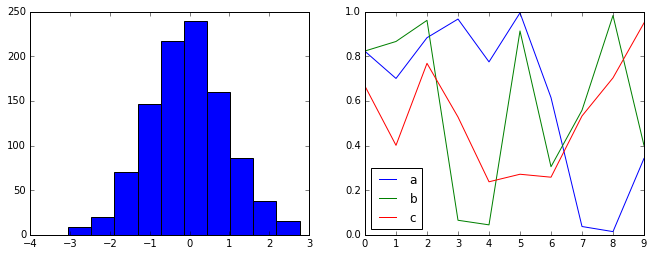

In [70]:
hist_and_lines()

#### 2. FiveThirtyEight风格
FiveThirtyEight 风格模仿的是著名网[FiveThirtyEight](http://fivethirtyeight.com)的绘图风格。如图4-86 所示，这种风格使用深色的粗线条和透明的坐标轴：

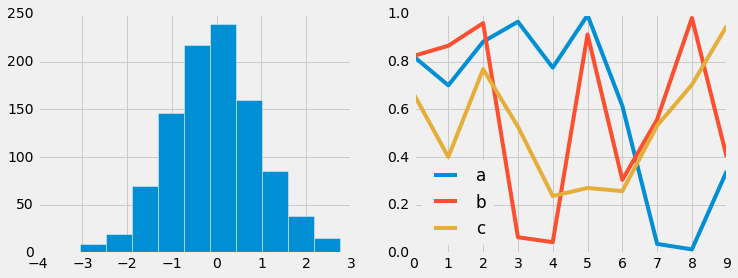

In [71]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

#### 3. ggplot风格
R 语言的ggplot 是非常流行的可视化工具，Matplotlib 的ggplot 风格就是模仿这个程序包的默认风格（如图4-87 所示）：

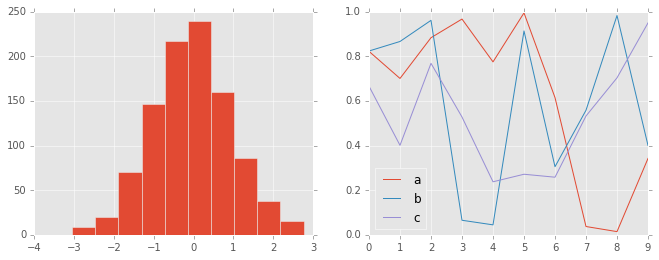

In [72]:
with plt.style.context('ggplot'):
    hist_and_lines()

#### 4. bmh风格
有一本短小精悍的在线图书叫[Probabilistic Programming and Bayesian Methods for Hackers](http://bit.ly/2fDJsKC)。整本书的图形都是用Matplotlib 创建的，通过一组rc 参数创建了一种引人注目的绘图风格。这个风格被bmh 样式表继承了（如图4-88 所示）：

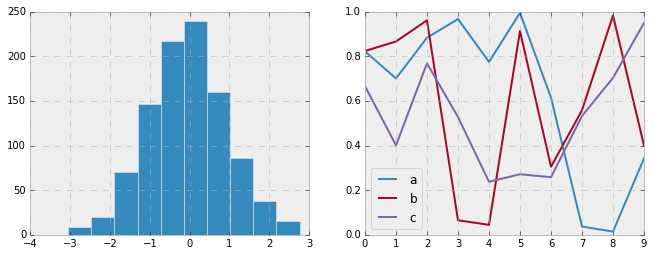

In [73]:
with plt.style.context('bmh'):
    hist_and_lines()

#### 5. 黑色背景风格
在演示文档中展示图形时，用黑色背景而非白色背景往往会取得更好的效果。dark_background 风格就是为此设计的（如图4-89 所示）：

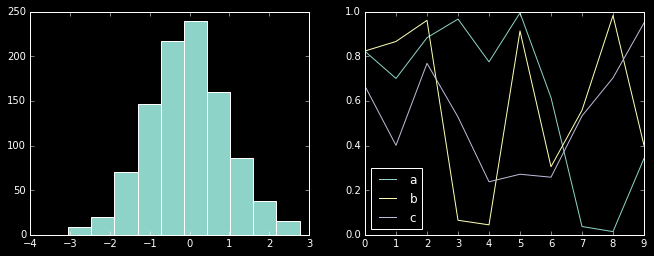

In [74]:
with plt.style.context('dark_background'):
    hist_and_lines()

#### 6. 灰度风格
有时你可能会做一些需要打印的图形，不能使用彩色。这时使用grayscale 风格的效果最
好，如图4-90 所示：

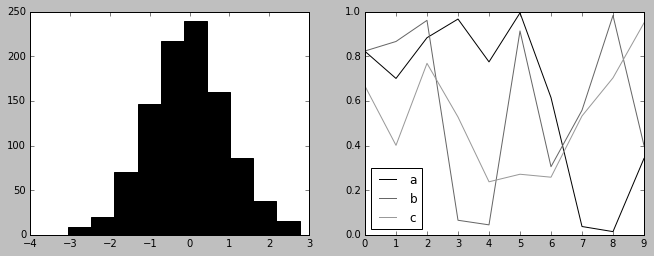

In [75]:
with plt.style.context('grayscale'):
    hist_and_lines()

#### 7. Seaborn风格
Matplotlib 还有一些灵感来自Seaborn 程序库（将在4.16 节详细介绍）的风格，这些风格在Notebook 导入Seaborn 程序库后会自动加载。我觉得这些风格非常漂亮，也是我自己在探索数据时一直使用的默认风格（如图4-91 所示）：

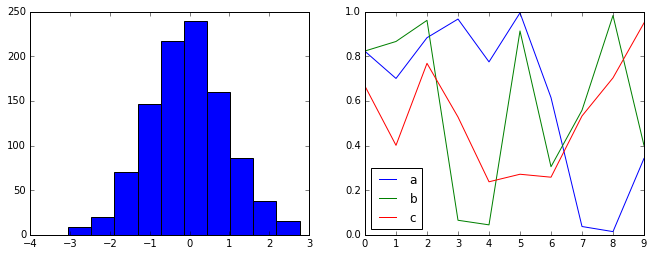

In [76]:
import seaborn
hist_and_lines()

通过运用各式各样的内置绘图风格，Matplotlib 在交互式可视化与创建印刷品图形两方面都表现得越来越好。在创建这本书的图形时，我通常会用一种或几种内置的绘图风格。